In [10]:
#Both parts of the assignment are in the same file, Regression is fiollowed by clustering
# Importing required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')
data.rename(columns={'Living.Room':'Livingroom'}, inplace=True)
data.head()


Sqft  Floor  TotalFloor  Bedroom  Livingroom  Bathroom  Price
1  1177.698      2           7        2           2         2  62000
2  2134.800      5           7        4           2         2  78000
3  1138.560      5           7        2           2         1  58000
4  1458.780      2           7        3           2         2  45000
5   967.776     11          14        3           2         2  45000

In [12]:
#Basic column-wise analysis
print(data.info())
print(data.describe())
# we find that there are no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sqft        645 non-null    float64
 1   Floor       645 non-null    int64  
 2   TotalFloor  645 non-null    int64  
 3   Bedroom     645 non-null    int64  
 4   Livingroom  645 non-null    int64  
 5   Bathroom    645 non-null    int64  
 6   Price       645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB
None
              Sqft       Floor  TotalFloor     Bedroom  Livingroom  \
count   645.000000  645.000000  645.000000  645.000000  645.000000   
mean   1527.656260    5.939535   10.855814    2.837209    1.813953   
std     767.386531    3.884721    4.996208    1.010740    0.462364   
min     359.358000    1.000000    1.000000    1.000000    0.000000   
25%     925.080000    3.000000    7.000000    2.000000    2.000000   
50%    1423.200000    5.000000   12.000000    3.000

In [13]:
#data correlation
data.corr()


Sqft     Floor  TotalFloor   Bedroom  Livingroom  Bathroom  \
Sqft        1.000000  0.143249    0.304515  0.615608    0.455940  0.728869   
Floor       0.143249  1.000000    0.564221  0.023986   -0.023563  0.099772   
TotalFloor  0.304515  0.564221    1.000000  0.067298    0.029373  0.146132   
Bedroom     0.615608  0.023986    0.067298  1.000000    0.526532  0.643083   
Livingroom  0.455940 -0.023563    0.029373  0.526532    1.000000  0.546826   
Bathroom    0.728869  0.099772    0.146132  0.643083    0.546826  1.000000   
Price       0.825514  0.244553    0.333631  0.467059    0.328788  0.605542   

               Price  
Sqft        0.825514  
Floor       0.244553  
TotalFloor  0.333631  
Bedroom     0.467059  
Livingroom  0.328788  
Bathroom    0.605542  
Price       1.000000

<AxesSubplot:xlabel='Floor'>

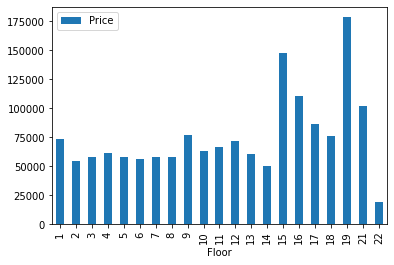

In [14]:
data.groupby("Floor").agg({"Price":"mean"}).plot(kind="bar")
#show that houses on floor 19 have highest average prices

In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(data)
#helps us analyse the variable relationship much faster since the dataset is small 

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
X = data.iloc[:, 0:6].values
y = data.iloc[:, -1].values

In [17]:
X.shape

(645, 6)

In [18]:
y.shape

(645,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

[ 96333.33333333  20033.33333333  55000.          54666.66666667
  32000.         126666.66666667 135999.66666667  70666.66666667
  89933.33333333  48266.33333333  41333.33333333  34000.
  27333.33333333  51600.          41333.33333333 106666.33333333
  41259.          41933.33333333  70333.33333333  45600.
  25333.33333333 176666.66666667  78000.         103333.
  62666.66666667  73000.          72333.33333333  51600.
  97999.66666667  48666.66666667  93333.          32166.66666667
  79333.33333333 129629.33333333  45600.          41342.66666667
  58000.          92333.33333333  47666.66666667  39900.
  47266.33333333  52592.33333333  78000.          59333.33333333
 100000.          41000.          58333.33333333  37333.33333333
 195000.          58333.33333333 183333.33333333  50666.66666667
  34000.          38333.33333333  62200.          92333.33333333
  62333.33333333  51666.66666667 103333.33333333  70000.
  88333.33333333 100000.          36667.33333333  34333.33333333
  92666.

<AxesSubplot:>

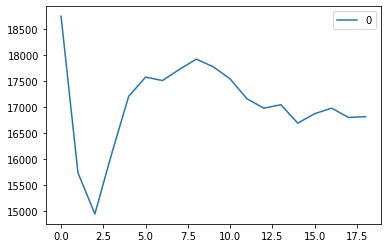

In [20]:
from sklearn.neighbors import KNeighborsRegressor
NN_model = KNeighborsRegressor(n_neighbors = 3)
NN_model.fit(X_train, y_train)

y_predict = NN_model.predict(X_test)
print(y_predict)
print(NN_model.score(X_train, y_train))
print(NN_model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = []
for k in range(1,20):
    NN_model = KNeighborsRegressor(n_neighbors = k)
    NN_model.fit(X_train, y_train)
    y_predict = NN_model.predict(X_test)
    
    error = sqrt(mean_squared_error(y_test, y_predict))
    rmse.append(error)
    print(k, error)
    
graph = pd.DataFrame(rmse)    
graph.plot()


[0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 1 0 2 1 0 1 2 1 2 2 0 0 0 1 0 0 0 0 0
 0 2 0 2 0 0 0 1 0 0 1 2 0 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 2 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 2 2 1 1 0 0 1 0
 0 1 0 1 0 2 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 2 0 0 0 0 0 1 2
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 2 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 2 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 2 0 1 0 2 0 1 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 2 1 0 1 0 0 1 0 0 0
 1 1 1 2 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 2 1 0 0 0 2 0 0 0 1 0
 2 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 2 0 0 1 1 0 0 1 2 0 0 1 0 0 0 1 2
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 2 0 2 1 1 1 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 2 1 

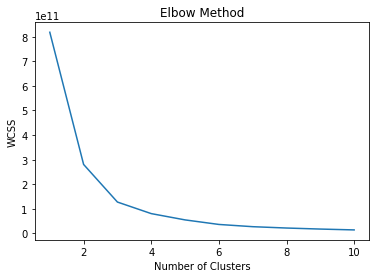

In [21]:
X = data.values

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
k_means.fit(X)

print(k_means.labels_)

wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X)
    wcss_i = km.inertia_
    wcss.append(wcss_i)
    print(k,wcss_i)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
data['labels']=k_means.labels_
data.head()

Sqft  Floor  TotalFloor  Bedroom  Livingroom  Bathroom  Price  labels
1  1177.698      2           7        2           2         2  62000       0
2  2134.800      5           7        4           2         2  78000       1
3  1138.560      5           7        2           2         1  58000       0
4  1458.780      2           7        3           2         2  45000       0
5   967.776     11          14        3           2         2  45000       0

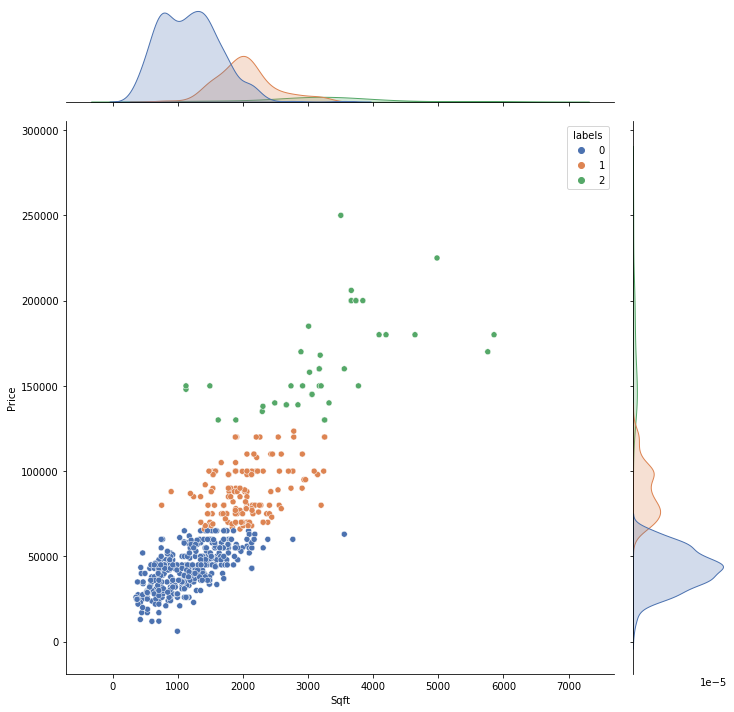

In [23]:
sns.jointplot(data=data , x='Sqft' , y ='Price',kind='scatter',hue='labels',palette=sns.color_palette("deep",3),height=10,legend="full")

In [24]:
filtered_data0=data[data['labels']==0]
filtered_data1=data[data['labels']==1]
filtered_data2=data[data['labels']==2]

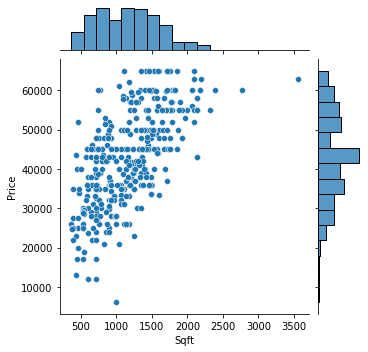

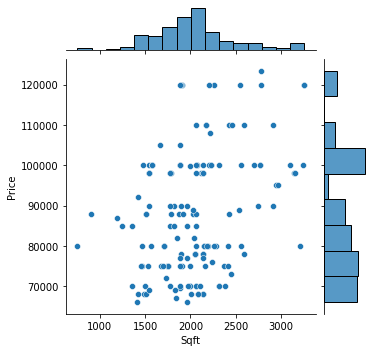

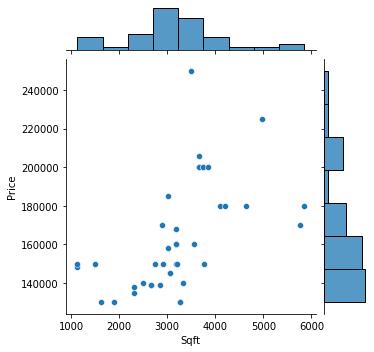

In [25]:

sns.jointplot(data=filtered_data0 , x='Sqft' , y ='Price',kind='scatter',height=5)

sns.jointplot(data=filtered_data1 , x='Sqft' , y ='Price',kind='scatter',height=5)

sns.jointplot(data=filtered_data2 , x='Sqft' , y ='Price',kind='scatter',height=5)


In [26]:
#Analysis of each cluster
print(filtered_data0.describe())
print(filtered_data1.describe())
print(filtered_data2.describe())

              Sqft       Floor  TotalFloor     Bedroom  Livingroom  \
count   441.000000  441.000000  441.000000  441.000000  441.000000   
mean   1182.764721    5.560091    9.965986    2.535147    1.732426   
std     460.182343    3.400754    4.401572    0.955493    0.482480   
min     359.358000    1.000000    1.000000    1.000000    0.000000   
25%     796.992000    3.000000    7.000000    2.000000    1.000000   
50%    1167.024000    5.000000    9.000000    3.000000    2.000000   
75%    1487.244000    7.000000   12.000000    3.000000    2.000000   
max    3558.000000   22.000000   27.000000    5.000000    3.000000   

         Bathroom         Price  labels  
count  441.000000    441.000000   441.0  
mean     1.575964  43025.469388     0.0  
std      0.530234  11518.807454     0.0  
min      1.000000   6100.000000     0.0  
25%      1.000000  35000.000000     0.0  
50%      2.000000  43000.000000     0.0  
75%      2.000000  50000.000000     0.0  
max      3.000000  65000.000000  

<AxesSubplot:>

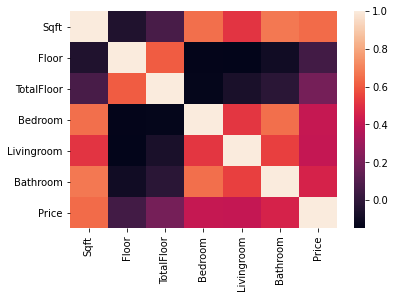

In [28]:
# above allows us to make comparisons b/w the three clusters based on the corresponding mean values. We can further compare below correlation matrices
sns.heatmap(filtered_data0.iloc[:,0:7].corr())


<AxesSubplot:>

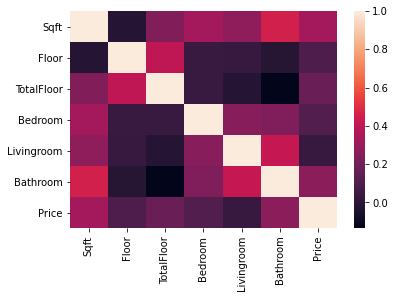

In [29]:
sns.heatmap(filtered_data1.iloc[:,0:7].corr())


<AxesSubplot:>

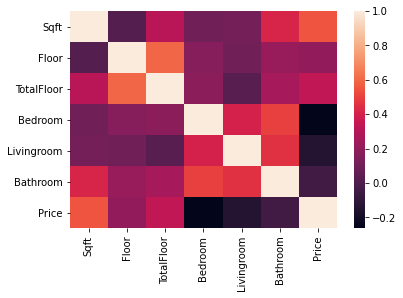

In [30]:
sns.heatmap(filtered_data2.iloc[:,0:7].corr())
